### **Multi-Class Classification Using SVC (Support Vector Classifier)**

In [1]:
"""
   - Support Vector Machines (SVM) were originally designed for **binary classification**.
   - Multi-class classification is achieved using strategies like **One-vs-Rest (OvR)**.
   - In OvR:
       * For N classes, the model trains N binary SVM classifiers.
       * Each classifier distinguishes **one class vs all other classes**.

2. How it works (Step by step):

   Step 1: One-vs-Rest training
   - Suppose we have 3 classes: setosa, versicolor, virginica.
   - The model creates 3 binary SVM classifiers:
       Classifier 1: setosa vs (versicolor + virginica)
       Classifier 2: versicolor vs (setosa + virginica)
       Classifier 3: virginica vs (setosa + versicolor)
   - Each classifier learns its own **hyperplane** and calculates **weights (w)** and **bias (b)**.
   - Each binary classifier can produce a **decision function** (score) for a sample.


   Step 2: Predicting scores
   - For a new sample, each classifier outputs a **score (decision function)**:
       score = w · X + b
   - Score indicates **distance from the hyperplane**:
       * Positive → predicts the "positive" class of that binary classifier.
       * Negative → predicts "rest" class.
   - For multi-class, we collect scores from **all N classifiers** for that sample.


   Step 3: Selecting final class
   - Compare the **scores of all classifiers**.
   - The class with the **highest score** is assigned as the predicted class.
"""

'\n   - Support Vector Machines (SVM) were originally designed for **binary classification**.\n   - Multi-class classification is achieved using strategies like **One-vs-Rest (OvR)**.\n   - In OvR:\n       * For N classes, the model trains N binary SVM classifiers.\n       * Each classifier distinguishes **one class vs all other classes**.\n\n2. How it works (Step by step):\n\n   Step 1: One-vs-Rest training\n   - Suppose we have 3 classes: setosa, versicolor, virginica.\n   - The model creates 3 binary SVM classifiers:\n       Classifier 1: setosa vs (versicolor + virginica)\n       Classifier 2: versicolor vs (setosa + virginica)\n       Classifier 3: virginica vs (setosa + versicolor)\n   - Each classifier learns its own **hyperplane** and calculates **weights (w)** and **bias (b)**.\n   - Each binary classifier can produce a **decision function** (score) for a sample.\n\n\n   Step 2: Predicting scores\n   - For a new sample, each classifier outputs a **score (decision function)**:\

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix, classification_report

In [3]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
X = df.drop("species", axis=1)
y = df["species"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
y_pred = model.predict(X_test)

In [9]:
# Get decision scores from the trained SVC model 
# Each row corresponds to a sample, each column corresponds to a class
# Higher score → classifier is more confident that sample belongs to that class
scores = model.decision_function(X_test)
print(scores)

[[-0.22785711  2.2185091   1.06821125]
 [ 2.22316775  1.1933654  -0.25770032]
 [-0.20474798  0.79992992  2.25190594]
 [-0.22627764  2.21830051  1.05919259]
 [-0.2273282   2.2060036   1.11498701]
 [ 2.22693472  1.18113733 -0.25622694]
 [-0.1814049   2.24010648  0.80663493]
 [-0.22904148  1.10469781  2.21160039]
 [-0.2321336   2.2150391   1.10749526]
 [-0.20423944  2.23963869  0.83539551]
 [-0.23153366  1.14311982  2.20116247]
 [ 2.23197959  1.14653727 -0.25149938]
 [ 2.2344689   1.16058303 -0.25583536]
 [ 2.23032862  1.1596892  -0.25312285]
 [ 2.23417798  1.15619128 -0.25478103]
 [-0.22437328  2.20571835  1.10300379]
 [-0.23386735  0.90745813  2.24410068]
 [-0.20496246  2.23917707  0.83817225]
 [-0.22520955  2.22209269  1.0265038 ]
 [-0.23658356  0.95733375  2.24053714]
 [ 2.22842334  1.159708   -0.25197635]
 [-0.2334258   1.18038521  2.17879989]
 [ 2.22696266  1.17378319 -0.2543987 ]
 [-0.23676167  0.98160307  2.23836882]
 [-0.2007493   0.86110161  2.23008615]
 [-0.23239778  1.08120724

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



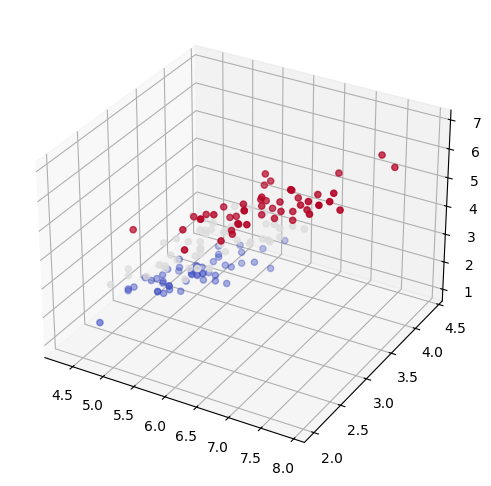

In [15]:
# Select features from the dataframe for 3D visualization
x1 = df["sepal_length"]  # X-axis: sepal length
x2 = df["sepal_width"]   # Y-axis: sepal width
x3 = df["petal_length"]  # Z-axis: petal length

# Convert species names to numeric codes for color mapping
y = df["species"].astype('category').cat.codes  
# Example: setosa→0, versicolor→1, virginica→2

# 3D Axes
fig = plt.figure(figsize=(8, 6))
# figsize sets the width=8 inches and height=6 inches

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(x1, x2, x3, c=y, cmap='coolwarm')